In [1]:
%reload_ext nb_black
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.power import TTestIndPower
import seaborn as sns

<IPython.core.display.Javascript object>

# European Social Survey

In [2]:
# load in data

ess_comb = pd.read_csv("data/ess_combined_2012_2014.csv")

<IPython.core.display.Javascript object>

In [3]:
ess_comb.info()
# no nulls, so we'll need to check how/if they were handled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    8147 non-null   object
 1   idno     8147 non-null   int64 
 2   year     8147 non-null   int64 
 3   tvtot    8147 non-null   int64 
 4   ppltrst  8147 non-null   int64 
 5   pplfair  8147 non-null   int64 
 6   pplhlp   8147 non-null   int64 
 7   happy    8147 non-null   int64 
 8   sclmeet  8147 non-null   int64 
 9   sclact   8147 non-null   int64 
 10  gndr     8147 non-null   int64 
 11  agea     8147 non-null   int64 
 12  partner  8147 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


<IPython.core.display.Javascript object>

In [4]:
ess_comb.head(10)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1
5,CH,40,6,3,0,5,2,0,2,2,1,76,1
6,CH,41,6,2,4,5,3,10,5,2,2,30,1
7,CH,51,6,2,8,8,8,9,6,4,2,84,2
8,CH,53,6,4,4,4,8,7,4,2,2,62,1
9,CH,55,6,1,6,7,7,9,5,2,2,33,1


<IPython.core.display.Javascript object>

In [5]:
ess_comb.nunique()

cntry         6
idno       3076
year          2
tvtot         8
ppltrst      11
pplfair      11
pplhlp       11
happy        11
sclmeet       7
sclact        5
gndr          2
agea         83
partner       2
dtype: int64

<IPython.core.display.Javascript object>

### 1. Did people become less trusting from 2012 to 2014?

In [6]:
# split the data
# year == 6 -> 2012, 7 -> 2014
ess12 = ess_comb[ess_comb["year"] == 6]
ess14 = ess_comb[ess_comb["year"] == 7]

<IPython.core.display.Javascript object>

(array([109.,  88., 224., 326., 369., 826., 516., 759., 625., 234.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

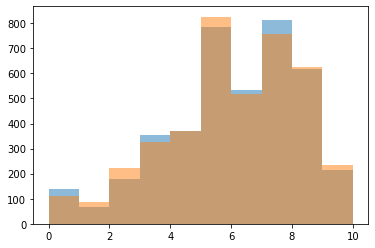

<IPython.core.display.Javascript object>

In [7]:
# investigate the distribution of trust. Likert style survey q, considering it as continuous
# if both are approp normal, will do an ISTT
plt.hist(ess12["ppltrst"], alpha=0.5, label="2012")
plt.hist(ess14["ppltrst"], alpha=0.5, label="2014")

In [8]:
# strikingly similar, check skewness and kurtosis
print(stats.describe(ess12["ppltrst"]))
print(stats.describe(ess14["ppltrst"]))

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


<IPython.core.display.Javascript object>

In [9]:
# we now have the shapiro test, let's use it
print(stats.shapiro(ess12["ppltrst"]))
print(stats.shapiro(ess14["ppltrst"]))

# both are significantly different than normal!

(0.9520939588546753, 1.4426241793085802e-34)
(0.9580563902854919, 9.222525335052542e-33)


<IPython.core.display.Javascript object>

In [10]:
# can use wilcoxon to see if there is a difference between years
stats.wilcoxon((ess14["ppltrst"] - ess12["ppltrst"]))

C:\Users\dgump\miniconda3\lib\site-packages\scipy\stats\morestats.py:2882: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Users\dgump\miniconda3\lib\site-packages\scipy\stats\morestats.py:2883: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


WilcoxonResult(statistic=0.0, pvalue=0.0)

<IPython.core.display.Javascript object>

In [11]:
# ok, so the samples aren't paired. Try Kruskal?
# really should have picked one beforehand t0 avoid hacking, but we're here to learn
stats.kruskal(ess12["ppltrst"], ess14["ppltrst"])

KruskalResult(statistic=0.11927994139654356, pvalue=0.7298167669759283)

<IPython.core.display.Javascript object>

#### Based on this H-value, it is unlikely either distribution is different from the population

### 2. Did people become happier from 2012 to 2014?

(array([   8.,   10.,   23.,   55.,   85.,  292.,  312.,  724., 1230.,
        1337.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

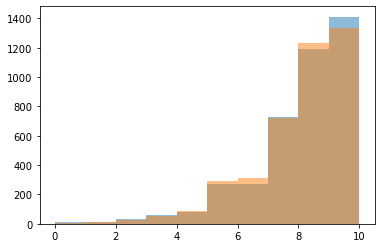

<IPython.core.display.Javascript object>

In [12]:
# 2nd verse, same as the first
plt.hist(ess12["happy"], alpha=0.5, label="2012")
plt.hist(ess14["happy"], alpha=0.5, label="2014")

In [13]:
# definitely not normal. yikes level not normal, investigate to be sure
# definite ceiling effect
# these variables are three discrete variables stacked on top of each other wearing a continuous trench coat
print(stats.shapiro(ess12["happy"]))
print(stats.shapiro(ess14["happy"]))
# as expected

(0.8943395018577576, 0.0)
(0.9060227870941162, 1.2611686178923354e-44)


<IPython.core.display.Javascript object>

In [14]:
stats.kruskal(ess12["happy"], ess14["happy"])

# fail to reject null, both variables have the same distribution

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

<IPython.core.display.Javascript object>

### 3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [15]:
ess14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4076 entries, 732 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    4076 non-null   object
 1   idno     4076 non-null   int64 
 2   year     4076 non-null   int64 
 3   tvtot    4076 non-null   int64 
 4   ppltrst  4076 non-null   int64 
 5   pplfair  4076 non-null   int64 
 6   pplhlp   4076 non-null   int64 
 7   happy    4076 non-null   int64 
 8   sclmeet  4076 non-null   int64 
 9   sclact   4076 non-null   int64 
 10  gndr     4076 non-null   int64 
 11  agea     4076 non-null   int64 
 12  partner  4076 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 605.8+ KB


<IPython.core.display.Javascript object>

In [16]:
print(ess12.cntry.value_counts())
print(ess14.cntry.value_counts())

ES    1158
SE     859
CH     732
NO     708
CZ     601
DE      13
Name: cntry, dtype: int64
ES    1134
SE     867
CH     743
NO     712
CZ     606
DE      14
Name: cntry, dtype: int64


<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023FAA505A88>,
      dtype=object)

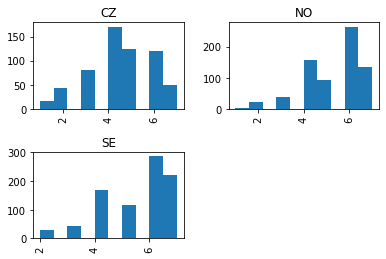

<IPython.core.display.Javascript object>

In [24]:
# Sweden, switzerland, and Norway
ess14_3 = ess14[ess14["cntry"].isin(["SE", "CZ", "NO"])]
ess14_3["sclmeet"].hist(by=ess14_3["cntry"])

In [27]:
no = ess14_3[ess14_3["cntry"] == "NO"]
se = ess14_3[ess14_3["cntry"] == "SE"]
cz = ess14_3[ess14_3["cntry"] == "CZ"]
stats.kruskal(no["sclmeet"], se["sclmeet"], cz["sclmeet"])

KruskalResult(statistic=162.95241729022774, pvalue=4.1241284089954195e-36)

<IPython.core.display.Javascript object>

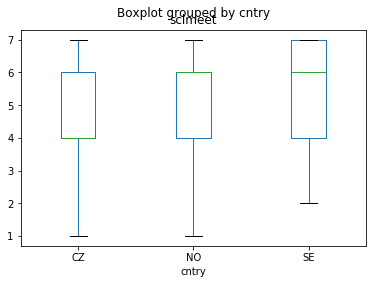

<IPython.core.display.Javascript object>

In [35]:
# one of these countries is sig diff according to kruskal
ess14_3.boxplot("sclmeet", by="cntry", grid=False)

#switzerland has a lower median at 4. 

### 4. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023FAA9925C8>,
      dtype=object)

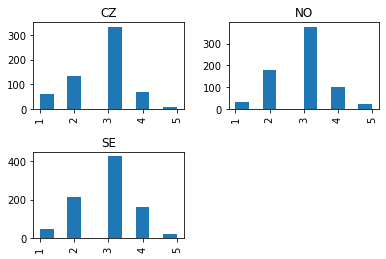

<IPython.core.display.Javascript object>

In [36]:
ess14_3["sclact"].hist(by=ess14_3["cntry"])

In [39]:
stats.f_oneway(no["sclact"], se["sclact"], cz["sclact"])

F_onewayResult(statistic=6.249739980298673, pvalue=0.0019656989728481906)

<IPython.core.display.Javascript object>

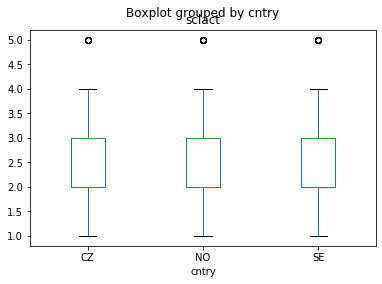

<IPython.core.display.Javascript object>

In [38]:
ess14_3.boxplot("sclact", by="cntry", grid=False)

# Ruff figural fluency test

In [40]:
ruff = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv"
)

<IPython.core.display.Javascript object>

In [41]:
ruff.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


<IPython.core.display.Javascript object>

In [57]:
ruff = ruff.pivot(index="Casenr", columns="Measurement", values="Unique")

<IPython.core.display.Javascript object>

In [58]:
ruff.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


<IPython.core.display.Javascript object>

In [62]:
ruff["2-3_diff"] = ruff["Measurement 3 (2008-2012)"] - ruff["Measurement 2 (2006-2008)"]

<IPython.core.display.Javascript object>

In [69]:
ruff.head()
ruff.shape

(2515, 4)

<IPython.core.display.Javascript object>

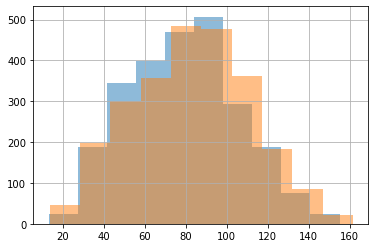

<IPython.core.display.Javascript object>

In [67]:
ruff["Measurement 2 (2006-2008)"].hist(alpha=0.5)
ruff["Measurement 3 (2008-2012)"].hist(alpha=0.5)
plt.show()

In [71]:
# seems normal, let's check with science
stats.describe(ruff["Measurement 2 (2006-2008)"])
stats.describe(ruff["Measurement 3 (2008-2012)"])

DescribeResult(nobs=2515, minmax=(13.5, 161.5), mean=82.7079522862823, variance=808.8049884464099, skewness=0.020360395669875728, kurtosis=-0.5479245402887649)

<IPython.core.display.Javascript object>

In [73]:
# Normal enough, run a dependent samples t-test
stats.ttest_rel(ruff["Measurement 3 (2008-2012)"], ruff["Measurement 2 (2006-2008)"])

Ttest_relResult(statistic=10.88544039426271, pvalue=5.3585747477799544e-27)

<IPython.core.display.Javascript object>

In [81]:
# create a confidence interval
signal = ruff["2-3_diff"].mean()
noise = ruff["2-3_diff"].std() / np.sqrt(ruff["2-3_diff"].size)
ci_upper = signal + 1.96 * noise
ci_lower = signal - 1.96 * noise

ci = (ci_lower, ci_upper)

<IPython.core.display.Javascript object>

In [83]:
ci
# There appears to be an increase of 3 to 4 unique figures from measurement 2 to 3 at thr 95% confidence level

(3.2924867263525623, 4.738527190148432)

<IPython.core.display.Javascript object>

### 2. Is there a significant difference in the number of perseverative errors drawn by the same participants from measurement 2 to measurement 3?

In [89]:
ruff = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv"
)

ruff = ruff.pivot(index="Casenr", columns="Measurement", values="Perseverative")

<IPython.core.display.Javascript object>

In [95]:
ruff.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


<IPython.core.display.Javascript object>

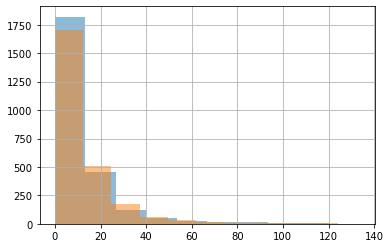

<IPython.core.display.Javascript object>

In [91]:
ruff["Measurement 2 (2006-2008)"].hist(alpha=0.5)
ruff["Measurement 3 (2008-2012)"].hist(alpha=0.5)
plt.show()

In [94]:
# not even a shade of normal. Wilcoxon time
stats.wilcoxon((ruff["Measurement 3 (2008-2012)"] - ruff["Measurement 2 (2006-2008)"]))

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)

<IPython.core.display.Javascript object>